# 체크카드_XGBoost

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 데이터 불러오기
data = pd.read_excel('bank_pre.xlsx')

In [2]:
# 데이터 형태와 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   해외 거주 여부       300000 non-null  int64  
 1   성별             300000 non-null  int64  
 2   나이             300000 non-null  int64  
 3   신규 고객(6개월 이내)  300000 non-null  int64  
 4   거래 누적 기간(월)    300000 non-null  int64  
 5   지역 코드          300000 non-null  int64  
 6   고객 활성화 상태      300000 non-null  int64  
 7   가구 소득          300000 non-null  float64
 8   고객 구분          300000 non-null  int64  
 9   특별계좌           300000 non-null  int64  
 10  온라인 계좌         300000 non-null  int64  
 11  체크카드           300000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 27.5 MB


In [6]:
# 입력 변수와 출력 변수 분리
X = data.drop(columns=['특별계좌', '온라인 계좌', '체크카드'])
y = data[['체크카드']]

In [7]:
# 데이터를 훈련용과 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#XGBoost 모델을 만들고, 하이퍼파라미터를 조정합니다.
xgb_model = xgb.XGBClassifier(learning_rate=0.1,
                              max_depth=3,
                              min_child_weight=1,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              objective='binary:logistic',
                              n_estimators=1000,
                              seed=27)


In [10]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [11]:
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.25%


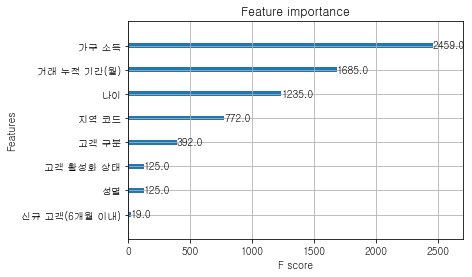

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

# XGBoost 모델을 학습한 뒤에 feature importance plot을 그림
xgb_model.fit(X_train, y_train)
plot_importance(xgb_model)
plt.show()